In [2]:
import numpy as np 
import pandas as pd 
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [3]:
train= pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d %H:%M:%S')
#train= pd.read_csv('train.csv', parse_dates=['datetime'],date_parser=dateparse)
#test = pd.read_csv('test.csv', parse_dates=['datetime'],date_parser=dateparse)

In [5]:
data=train.append(test)

/Users/manjunathvhatkar/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [6]:
data.head()

,atemp,casual,count,datetime,holiday,humidity,registered,season,temp,weather,windspeed,workingday
0,14.395,3.0,16.0,2011-01-01 00:00:00,0,81,13.0,1,9.84,1,0.0,0
1,13.635,8.0,40.0,2011-01-01 01:00:00,0,80,32.0,1,9.02,1,0.0,0
2,13.635,5.0,32.0,2011-01-01 02:00:00,0,80,27.0,1,9.02,1,0.0,0
3,14.395,3.0,13.0,2011-01-01 03:00:00,0,75,10.0,1,9.84,1,0.0,0
4,14.395,0.0,1.0,2011-01-01 04:00:00,0,75,1.0,1,9.84,1,0.0,0


In [7]:
data.describe()

,atemp,casual,count,holiday,humidity,registered,season,temp,weather,windspeed,workingday
count,17379.000000,10886.000000,10886.000000,17379.000000,17379.000000,10886.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,23.788755,36.021955,191.574132,0.028770,62.722884,155.552177,2.501640,20.376474,1.425283,12.736540,0.682721
std,8.592511,49.960477,181.144454,0.167165,19.292983,151.039033,1.106918,7.894801,0.639357,8.196795,0.465431
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.820000,1.000000,0.000000,0.000000
25%,16.665000,4.000000,42.000000,0.000000,48.000000,36.000000,2.000000,13.940000,1.000000,7.001500,0.000000
50%,24.240000,17.000000,145.000000,0.000000,63.000000,118.000000,3.000000,20.500000,1.000000,12.998000,1.000000
75%,31.060000,49.000000,284.000000,0.000000,78.000000,222.000000,3.000000,27.060000,2.000000,16.997900,1.000000
max,50.000000,367.000000,977.000000,1.000000,100.000000,886.000000,4.000000,41.000000,4.000000,56.996900,1.000000


In [7]:
#data.info()

In [8]:
# Root mean square log error function is used for evaluation.
def rmsle(y, y_,convertExp=True):
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [9]:
print(train.isnull().values.any())
print(test.isnull().values.any())

False
False


In [10]:
data["Dates"]=data["datetime"].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').date())
data["Time"]=data["datetime"].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').time())
data["Day"]=data["datetime"].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').day)
data["Month"]=data["datetime"].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').month)
data["Year"]=data["datetime"].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').year)
data["Hour"]=data["datetime"].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').hour)
data["Minute"]=data["datetime"].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').minute)
data["Second"]=data["datetime"].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').second)
data["Weekday"]=data["datetime"].map(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d %H:%M:%S').weekday())

In [11]:
#data.head()

In [12]:
datetimecol = test["datetime"]

data.drop('datetime',inplace=True,axis=1)
train = data[ data['count'].notnull()]
test = data[ data['count'].isnull()]

In [13]:
#data

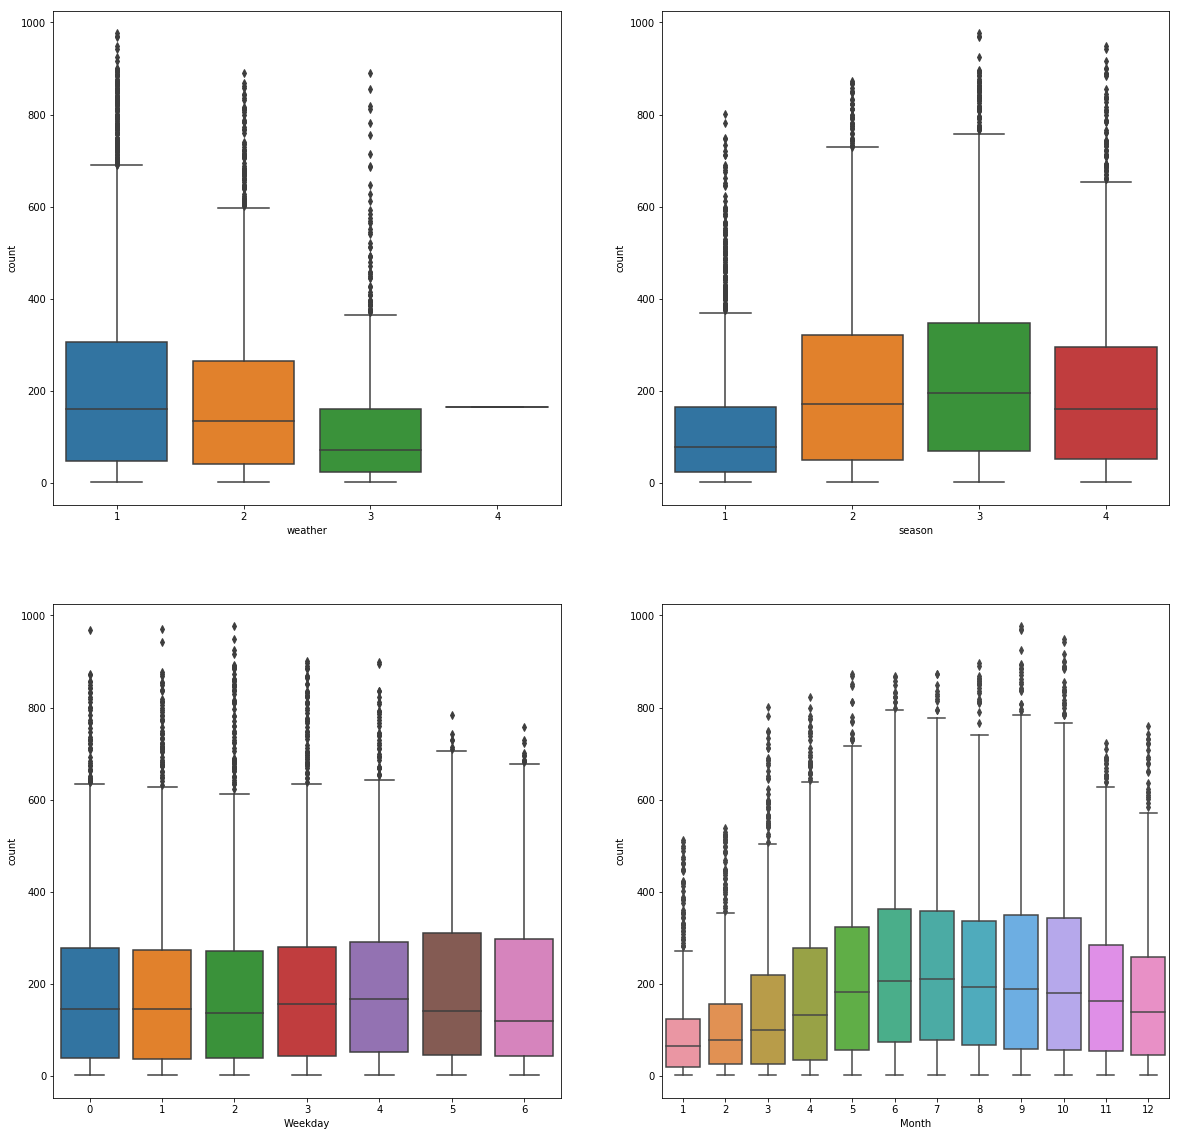

In [14]:
fig,axes= plt.subplots(2,2,figsize=(20,20))
sns.boxplot(data=train, y='count',x='weather',ax=axes[0,0])
sns.boxplot(data=train, y='count',x='season',ax=axes[0,1])
sns.boxplot(data=train, y='count',x='Weekday',ax=axes[1,0])
sns.boxplot(data=train, y='count',x='Month',ax=axes[1,1])
plt.savefig('Boxplot.png',dpi=900)
plt.show()



In [15]:
Month_grouped = train[['count','Month']].groupby('Month',as_index=False).mean()
Hour_season_grouped = (train.groupby(["Hour","season"],as_index=False)["count"].mean())
Hour_Weekday_grouped = (train.groupby(["Hour","Weekday"],as_index=False)["count"].mean())
Hour_Month_grouped = (train.groupby(["Hour","Month"],as_index=False)["count"].mean())
Hour_weather_grouped = (train.groupby(["Hour","weather"],as_index=False)["count"].mean())

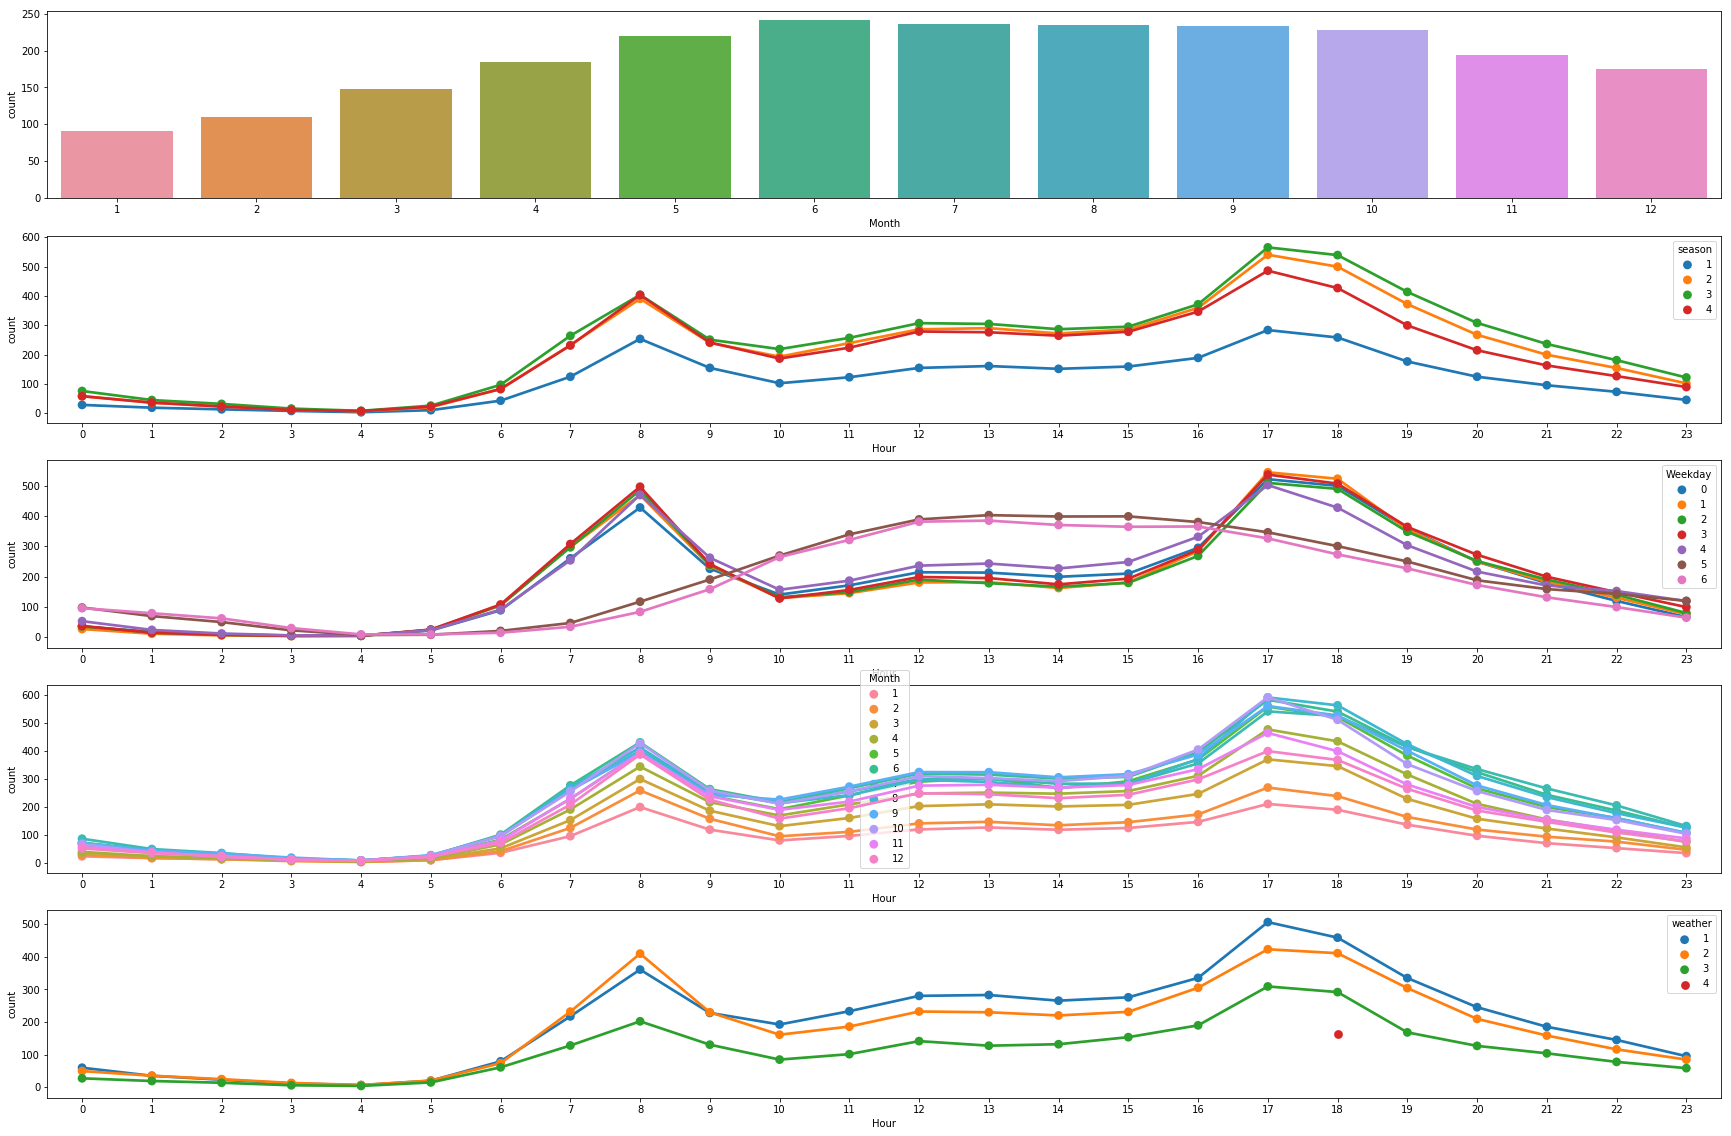

In [16]:
fig,axes= plt.subplots(5,1,figsize=(30,20))
sns.barplot( x = Month_grouped['Month'], y = Month_grouped['count'], ax=axes[0])
sns.pointplot( y = Hour_season_grouped['count'], x = Hour_season_grouped['Hour'],  hue=Hour_season_grouped['season'], join=True,ax=axes[1])
sns.pointplot( y = Hour_Weekday_grouped['count'], x = Hour_Weekday_grouped['Hour'],  hue=Hour_Weekday_grouped['Weekday'], join=True,ax=axes[2])
sns.pointplot( y = Hour_Month_grouped['count'], x = Hour_Month_grouped['Hour'],  hue=Hour_Month_grouped['Month'], join=True,ax=axes[3])
sns.pointplot( y = Hour_weather_grouped['count'], x = Hour_weather_grouped['Hour'],  hue=Hour_weather_grouped['weather'], join=True,ax=axes[4])
plt.savefig('barplot-pointplot.png',dpi=900)
plt.show()

In [17]:
""" Removing Outliers """
train['humidity']=train['humidity'].replace([0],61) 
train['windspeed']=train['windspeed'].replace([56.9969],20)

# As casual+register = count and atemp is highly correlated with temp so we will drop them all :P
test.drop(['casual','registered','count','atemp'],inplace=True,axis=1)
train.drop(['casual','registered','atemp'],inplace=True,axis=1)
X = train.drop('count',axis=1)
y = train['count']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/index

In [18]:
# "train_test_split"
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [19]:
type(y_train)

pandas.core.series.Series

In [20]:
# Gradient Boosted Regression
gbreg = GradientBoostingRegressor()
param_grid = {'n_estimators': [2000,2500],'learning_rate':[0.5,0.3,0.2]}
CV_gbreg = GridSearchCV(estimator=gbreg,param_grid=param_grid,cv=5)
CV_gbreg.fit(X=X_train,y=np.log1p(y_train))
print("Best Paramters for Gradient boosted regression: ",CV_gbreg.best_params_)
preds = CV_gbreg.predict(X=X_test)
print ("RMSLE Value for Gradient Boosted Regression: ",  rmsle( np.exp([max(x,0) for x in preds]) ,y_test,False))
predictions = CV_gbreg.predict(test)
for i in range(len(predictions)):
    if predictions[i]<=0:
        predictions[i]=0
pd.DataFrame({'Datetime': datetimecol, 'count': predictions}).to_csv("bike_gbr.csv", index=False)

TypeError: float() argument must be a string or a number, not 'datetime.time'